<a href="https://colab.research.google.com/github/emrahyurtlu/deep-learning/blob/main/CMPE430/Lab_8_Binary_Classification_with_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 8 - Binary Classification**

09.12.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://towardsdatascience.com/nlp-spam-detection-in-sms-text-data-using-deep-learning-b8632db85cc8



**IMDB Dataset:** a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [ ]:
# Loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive.

**Note :** Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. 

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [ ]:
 train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

You can decode one of these reviews back to English words:

In [ ]:
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #reverses it, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #Decodes the review. 

#Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

You have to turn your lists into tensors.

One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [ ]:
#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #Creates an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 #Sets specific indices of results[i] to 1s
  return results

In [ ]:
x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data

In [ ]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
#also vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#The model definition
from keras import models
from keras import layers
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

Because you’re facing a binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation)

In [ ]:
#Compiling the model
model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [ ]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training your model
history = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5009 - accuracy: 0.7817 - val_loss: 0.3851 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2964 - accuracy: 0.9060 - val_loss: 0.2980 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2195 - accuracy: 0.9290 - val_loss: 0.2946 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1745 - accuracy: 0.9425 - val_loss: 0.2831 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1410 - accuracy: 0.9553 - val_loss: 0.2822 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1175 - accuracy: 0.9630 - val_loss: 0.3086 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0948 - accuracy: 0.9717 - val_loss: 0.3165 - val_accuracy: 0.8811
Epoch 8/20
30

History object. This object has a member history, which is a dictionary containing data about everything that happened during training.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

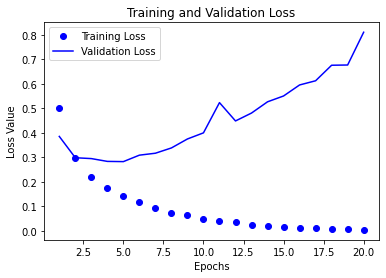

In [ ]:
import matplotlib.pyplot as plt
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

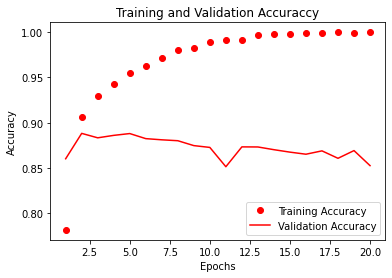

In [ ]:
# Training and Validation Accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model1.predict(x_test)

array([[1.4792979e-03],
       [9.9999964e-01],
       [4.9021608e-01],
       ...,
       [1.9010901e-04],
       [2.6933551e-03],
       [5.5172175e-02]], dtype=float32)

In [ ]:
_, accuracy_test = model1.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9149 - accuracy: 0.8369


#**Spam-Not Spam SMS Binary Text Classification Example**

The SMS (text) data was downloaded from UCI datasets. It contains 5,574 SMS phone messages. The data were collected for the purpose of mobile phone spam research and have already been labeled as either spam or ham (non-spam).

For Dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/00228/

In [ ]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models, layers, optimizers, losses, metrics

##Load and explore the data

In [ ]:
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
data = pd.read_csv(url, sep ='\t',names=["label", "message"])
data.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


##Adding Label Numbers

ham = 0
spam = 1

In [ ]:
data["label"] = data["label"].astype('category') #By converting an existing Series or column to a category dtype
data.dtypes

label      category
message      object
dtype: object

In [ ]:
data["label_id"] = data["label"].cat.codes
data.head(20)

,label,message,label_id
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [ ]:
id_to_label = pd.Series(data.label.values,index=data.label_id).to_dict()
id_to_label

{0: 'ham', 1: 'spam'}

In [ ]:
label_to_id= {v:k for k,v in id_to_label.items()}
label_to_id

{'ham': 0, 'spam': 1}

In [ ]:
duplicatedRow = data[data.duplicated()]
print(duplicatedRow[:10])

    label                                            message  label_id
103   ham  As per your request 'Melle Melle (Oru Minnamin...         0
154   ham  As per your request 'Melle Melle (Oru Minnamin...         0
207   ham  As I entered my cabin my PA said, '' Happy B'd...         0
223   ham                             Sorry, I'll call later         0
326   ham                   No calls..messages..missed calls         0
339   ham                             Sorry, I'll call later         0
357  spam  Congratulations ur awarded 500 of CD vouchers ...         1
444   ham                             Sorry, I'll call later         0
533   ham                  Gudnite....tc...practice going on         0
655   ham                       Did u got that persons story         0


In [ ]:
#remove all duplicate rows
data.drop_duplicates()

In [ ]:
duplicatedRow = data[data.duplicated()]
print(duplicatedRow[:5])

Empty DataFrame
Columns: [label, message, label_id]
Index: []


##Data Balancing

In [ ]:
# Get all the ham and spam emails
ham_msg = data[data.label =='ham']
spam_msg = data[data.label=='spam']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


14.45969884853853

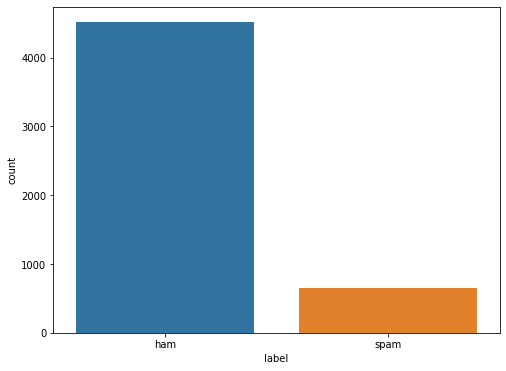

In [ ]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(data.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

A you can see data is not balanced. There are most frequent ham messages (85%) than spam (15%).

For our problem, we use downsampling.

**Downsampling** is a process where you randomly delete some of the observations from the majority class so that the numbers in majority and minority classes are matched.

In [ ]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(653, 3) (653, 3)


In [ ]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

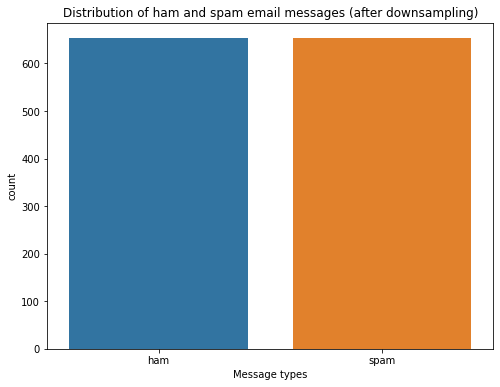

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

**Latest Data**

In [ ]:
msg_df

,label,message,label_id
0,ham,Evening * v good if somewhat event laden. Will...,0
1,ham,I'll probably be around mu a lot,0
2,ham,ALRITE,0
3,ham,Lol I would but despite these cramps I like be...,0
4,ham,Waiting 4 my tv show 2 start lor... U leh stil...,0
...,...,...,...
1301,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
1302,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
1303,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
1304,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
#shuffle the new dataset
msg_df = msg_df.sample(frac=1).reset_index(drop=True)

In [ ]:
msg_df

,label,message,label_id
0,spam,"Get 3 Lions England tone, reply lionm 4 mono o...",1
1,ham,"Men always needs a beautiful, intelligent, car...",0
2,spam,We tried to contact you re your reply to our o...,1
3,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",1
4,ham,Update your face book status frequently :),0
...,...,...,...
1301,spam,"January Male Sale! Hot Gay chat now cheaper, c...",1
1302,spam,What do U want for Xmas? How about 100 free te...,1
1303,ham,Wat makes some people dearer is not just de ha...,0
1304,spam,Want to funk up ur fone with a weekly new tone...,1


In [ ]:
text = msg_df['message']
label_id = msg_df['label_id']

##Text Vectorization

Since we cannot give the data as strings, we convert the sequences to vectors.

In [ ]:
maxlen=50 #Maximum sequence size

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    output_mode="int",
    output_sequence_length=maxlen,
)

In [ ]:
vectorize_layer.adapt(text) #Each word will be assigned an integer value
vocab = vectorize_layer.get_vocabulary() #To get words back from token indices

In [ ]:
for word in range(20):
  print(word, " represents the word: ", vocab[word])

0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  to
3  represents the word:  you
4  represents the word:  a
5  represents the word:  i
6  represents the word:  call
7  represents the word:  the
8  represents the word:  your
9  represents the word:  u
10  represents the word:  for
11  represents the word:  is
12  represents the word:  2
13  represents the word:  and
14  represents the word:  free
15  represents the word:  now
16  represents the word:  or
17  represents the word:  on
18  represents the word:  in
19  represents the word:  have


In [ ]:
print(" Given raw data (category): ", text[1] )
print(" Tokenized and Transformed to a vector of integers: ", vectorize_layer(tf.expand_dims(text[0], -1)))

 Given raw data (category):  Men always needs a beautiful, intelligent, caring, loving, adjustable, cooperative wife. But the law allows only one wife....
 Tokenized and Transformed to a vector of integers:  tf.Tensor(
[[  31  154 1514  552   91   37 1516   27 1072   16 1515   27  262   27
   104   56   12  952    7 1053  129  341  149 1210  157  358  469  153
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]], shape=(1, 50), dtype=int64)


##Train-Test Split

In [ ]:
train_msg,test_msg,train_labels,test_labels=train_test_split(text,label_id,test_size=0.2,random_state=0)

In [ ]:
train_msg

406     , ,  and  picking them up from various points ...
44      44 7732584351, Do you want a New Nokia 3510i c...
1069    Reading gud habit.. Nan bari hudgi yorge patai...
784     We know TAJ MAHAL as symbol of love. But the o...
963     Today's Offer! Claim ur £150 worth of discount...
                              ...                        
763     Hello. They are going to the village pub at 8 ...
835     Someonone you know is trying to contact you vi...
1216    Please CALL 08712402578 immediately as there i...
559     Jamster! To get your free wallpaper text HEART...
684     Thats cool. i am a gentleman and will treat yo...
Name: message, Length: 1044, dtype: object

In [ ]:
train_labels

406     0
44      1
1069    0
784     0
963     1
       ..
763     0
835     1
1216    1
559     1
684     0
Name: label_id, Length: 1044, dtype: int8

##Vectorization

**We have to pass the text data through the vectorize layer.**

In [ ]:
vectorized_train_msg = vectorize_layer(train_msg)

In [ ]:
vectorized_train_msg[0]

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([  13, 1432,  233,   64,   23, 1267,  237,  146,   12, 1955,   13,
        109,   47,   44,    7, 2958, 1043,   27,  154,  426,   13,  103,
          9,  117,  233,  186,  449,   12, 4279, 3027,  274,  364,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])>

In [ ]:
vectorized_test_msg = vectorize_layer(test_msg)

In [ ]:
vectorized_test_msg[0]

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 90, 185, 253,  81, 228, 742,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##Model

In [ ]:
#Dense model architecture
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(50,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop' ,metrics=['accuracy'])

In [ ]:
history = model.fit(vectorized_train_msg, y_train, epochs=10)

Epoch 1/10
33/33 [==============================] - 0s 2ms/step - loss: 2.5525 - accuracy: 0.8716
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1761 - accuracy: 0.8860
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 1.7263 - accuracy: 0.8937
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 1.3893 - accuracy: 0.9023
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 1.5651 - accuracy: 0.9167
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 1.4459 - accuracy: 0.9176
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 1.1662 - accuracy: 0.9234
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 1.2090 - accuracy: 0.9215
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 1.1040 - accuracy: 0.9368
Epoch 10/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.9406


In [ ]:
_,test_acc = model.evaluate(vectorized_test_msg,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8.6246 - accuracy: 0.7176
